## PHASE 1

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('melb_data.csv')

In [86]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


#Data Cleaning: Part-1

1. Understanding the data through statistical analysis

In [87]:
#The command df.describe() is used to generate summary statistics of a DataFrame
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

2. Deal with NULL values

In [89]:
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [90]:
#Count the number of NULL values in each feature
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [91]:
#Drop some Columns due to presence of Large number of missing values
df.drop(columns = ['YearBuilt', 'BuildingArea'], inplace = True)

In [92]:
df.drop(columns = ['CouncilArea'], inplace = True)

In [93]:
#Replace missing values in column 'Car'
mode = df['Car'].mode()[0]
df['Car'].fillna(mode, inplace = True)

In [94]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

3. Covert Object datatypes to Categorical

In [95]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [96]:
# Converting the data type of each of the below column to Category type
obj_col = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname']
for cols in obj_col:
  df[cols] = df[cols].astype('category')

4. Converting Date column from object to datetime

In [97]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_52800\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [98]:
df.dtypes

Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                     int64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                  int64
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount             int64
dtype: object

5. Detect Features in the dataset with possible Outliers

In [99]:
#Detecting outliers in a dataset using interquartile range
Q1 = df.select_dtypes(include=[np.number]).describe().loc['25%']
Q3 = df.select_dtypes(include=[np.number]).describe().loc['75%']
IQR = Q3 - Q1
# General Formula to calculate Lower Bound and Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fetch the columns where values are less than lower bound or greater than upper bound
outliers = ((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any()
outliers_cols = df.select_dtypes(include=[np.number]).columns[outliers]

In [100]:
outliers_cols

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

6. Remove Outliers from features

In [101]:
#Lets take Feature: 'Price' and remove any outlier

df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [102]:
df = df[df['Price'] >= 0]

In [103]:
Q1 = df['Price'].describe().loc['25%']
Q3 = df['Price'].describe().loc['75%']

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-370000.0
2350000.0


In [104]:
#For the column: "Price" keep only the values between Lower bound and upper bound
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [105]:
print(df['Price'].min())
print(df['Price'].max())

85000
2350000


In [106]:
#Lets take Feature: 'Landsize' and remove any outlier
df = df[df['Landsize'] > 0]

In [107]:
Q1 = df['Landsize'].describe().loc['25%']
Q3 = df['Landsize'].describe().loc['75%']

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-347.5
1272.5


In [108]:
df = df[(df['Landsize'] >= lower_bound) & (df['Landsize'] <= upper_bound)]

In [109]:
print(df['Landsize'].min())
print(df['Landsize'].max())

1
1272


7. Encode categorical data

In [110]:
#One hot encode categorical data
# obj_col = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname']
# for col in obj_col:
#   df= pd.get_dummies(df, columns=[col])

# df.tail()

In [111]:
# df.columns

8. Remove duplicate columns

In [112]:
# The columns: 'Rooms' and 'Bedroom2' are duplicate. Hence remove one column

df = df.drop(['Bedroom2'], 1)
df.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_52800\3340674759.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Bedroom2'], 1)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,1,1.0,202,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,1,0.0,156,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,2,0.0,134,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067,2,1.0,94,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067,1,2.0,120,-37.8072,144.9941,Northern Metropolitan,4019


9. Additional feature engineering

In [113]:
"""Remove some of the non-essential columns from the dataset
We will remove latitude and longitude values from the datset, as we cannot really predict
prices of houses from it"""

df = df.drop(['Lattitude', 'Longtitude'], 1)


C:\Users\shiva\AppData\Local\Temp\ipykernel_52800\2777108264.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Lattitude', 'Longtitude'], 1)


In [114]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,1,1.0,202,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,1,0.0,156,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-04-03,2.5,3067,2,0.0,134,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-04-03,2.5,3067,2,1.0,94,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067,1,2.0,120,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,582000,S,Red,2017-08-26,16.5,3049,2,2.0,256,Northern Metropolitan,2474
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,2017-08-26,16.7,3150,2,2.0,652,South-Eastern Metropolitan,7392
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,2017-08-26,6.8,3016,2,2.0,333,Western Metropolitan,6380
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,2017-08-26,6.8,3016,2,4.0,436,Western Metropolitan,6380


10. Dimensionality reduction of dataset

In [115]:
""" We aim to reduce dimensionality of the dataset, by combining multiple features into
a single feature

Here we have eliminated 2 columns: Price and Landsize and replaced them with
a new feature: Price_per_unitArea. So, we'll predict Price_per_unitArea instead
of price."""


df['Price_per_unitArea'] = df['Price']/df['Landsize']



In [116]:
df['Price_per_unitArea']

0         7326.732673
1         6634.615385
2        10932.835821
3         9042.553191
4        13333.333333
             ...     
13574     2273.437500
13575     1909.509202
13576     3096.096096
13577     2683.486239
13579     3549.723757
Name: Price_per_unitArea, Length: 10678, dtype: float64

In [117]:
print(df['Price_per_unitArea'].min())
print(df['Price_per_unitArea'].max())

136.0
710000.0


In [118]:
df = df.drop(['Price', 'Landsize'],1)
df

C:\Users\shiva\AppData\Local\Temp\ipykernel_52800\890445010.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Price', 'Landsize'],1)


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Regionname,Propertycount,Price_per_unitArea
0,Abbotsford,85 Turner St,2,h,S,Biggin,2016-03-12,2.5,3067,1,1.0,Northern Metropolitan,4019,7326.732673
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2016-04-02,2.5,3067,1,0.0,Northern Metropolitan,4019,6634.615385
2,Abbotsford,5 Charles St,3,h,SP,Biggin,2017-04-03,2.5,3067,2,0.0,Northern Metropolitan,4019,10932.835821
3,Abbotsford,40 Federation La,3,h,PI,Biggin,2017-04-03,2.5,3067,2,1.0,Northern Metropolitan,4019,9042.553191
4,Abbotsford,55a Park St,4,h,VB,Nelson,2016-04-06,2.5,3067,1,2.0,Northern Metropolitan,4019,13333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,S,Red,2017-08-26,16.5,3049,2,2.0,Northern Metropolitan,2474,2273.437500
13575,Wheelers Hill,12 Strada Cr,4,h,S,Barry,2017-08-26,16.7,3150,2,2.0,South-Eastern Metropolitan,7392,1909.509202
13576,Williamstown,77 Merrett Dr,3,h,SP,Williams,2017-08-26,6.8,3016,2,2.0,Western Metropolitan,6380,3096.096096
13577,Williamstown,83 Power St,3,h,S,Raine,2017-08-26,6.8,3016,2,4.0,Western Metropolitan,6380,2683.486239


11. Normalize the dataset

In [119]:
# cols = df.columns
# cols

In [120]:
# cols_ = ['Rooms','Distance','Postcode','Car','Propertycount', 'Price_per_unitArea'  ]
# for column in cols_:
#     df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [121]:
# # Normalize a feature that was left in the previous step
# df['Bathroom'] = (df['Bathroom'] - df['Bathroom'].min()) / (df['Bathroom'].max() - df['Bathroom'].min())

In [122]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Regionname,Propertycount,Price_per_unitArea
0,Abbotsford,85 Turner St,2,h,S,Biggin,2016-03-12,2.5,3067,1,1.0,Northern Metropolitan,4019,7326.732673
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2016-04-02,2.5,3067,1,0.0,Northern Metropolitan,4019,6634.615385
2,Abbotsford,5 Charles St,3,h,SP,Biggin,2017-04-03,2.5,3067,2,0.0,Northern Metropolitan,4019,10932.835821
3,Abbotsford,40 Federation La,3,h,PI,Biggin,2017-04-03,2.5,3067,2,1.0,Northern Metropolitan,4019,9042.553191
4,Abbotsford,55a Park St,4,h,VB,Nelson,2016-04-06,2.5,3067,1,2.0,Northern Metropolitan,4019,13333.333333


12. Handling datetime feature

In [123]:
#Creating new column Year, Month, and Day by spliting the Date column.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [124]:
df = df.drop(['Date'],1)

C:\Users\shiva\AppData\Local\Temp\ipykernel_52800\2256734731.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Date'],1)


In [125]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Regionname,Propertycount,Price_per_unitArea,Year,Month,Day
0,Abbotsford,85 Turner St,2,h,S,Biggin,2.5,3067,1,1.0,Northern Metropolitan,4019,7326.732673,2016,3,12
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,2.5,3067,1,0.0,Northern Metropolitan,4019,6634.615385,2016,4,2
2,Abbotsford,5 Charles St,3,h,SP,Biggin,2.5,3067,2,0.0,Northern Metropolitan,4019,10932.835821,2017,4,3
3,Abbotsford,40 Federation La,3,h,PI,Biggin,2.5,3067,2,1.0,Northern Metropolitan,4019,9042.553191,2017,4,3
4,Abbotsford,55a Park St,4,h,VB,Nelson,2.5,3067,1,2.0,Northern Metropolitan,4019,13333.333333,2016,4,6


In [126]:
# #one hot encode Year and Month columns
# df = pd.get_dummies(df, columns=['Year', 'Month'])

# #normalize Day column
# df['Day'] = (df['Day'] - df['Day'].min()) / (df['Day'].max() - df['Day'].min())

# Exploratory Data Analysis

1. Correlation matrix between features that are continous

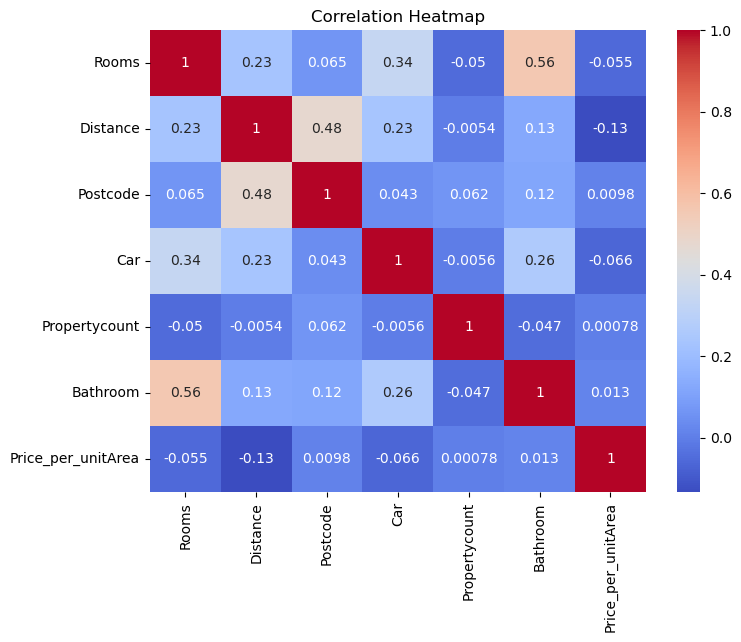

In [127]:
# Find correlation between features
cols_ = ['Rooms','Distance','Postcode','Car','Propertycount', 'Bathroom', 'Price_per_unitArea']
correlation_matrix = df[cols_].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

2. Visualising presence of outliers using Box plot

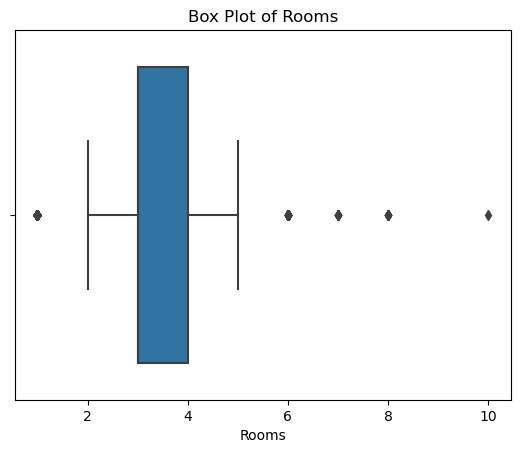

In [128]:
# We have not removed outliers from 'Rooms' feature in data cleaning
#Let's visualize the outliers
sns.boxplot(x=df['Rooms'])
plt.title('Box Plot of Rooms')
plt.show()

3. Visualize Relationship between Number of rooms and Price/area

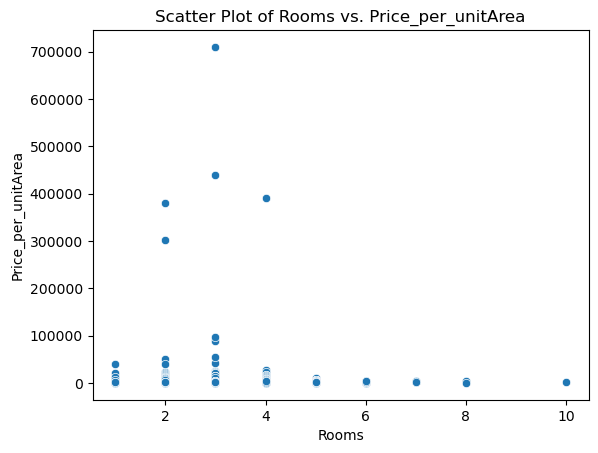

In [129]:
# I am assuming Price/unit land area will increase with number of rooms
#Let's check if it is true

sns.scatterplot(x=df['Rooms'], y=df['Price_per_unitArea'])
plt.title('Scatter Plot of Rooms vs. Price_per_unitArea')
plt.show()
#From the plot, we can see number of rooms alone doesnot mean higher price

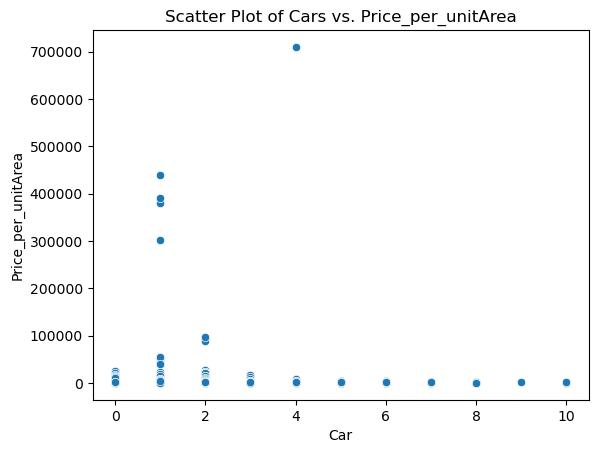

In [130]:
sns.scatterplot(x=df['Car'], y=df['Price_per_unitArea'])
plt.title('Scatter Plot of Cars vs. Price_per_unitArea')
plt.show()

4. Visualise trends in housing prices with year

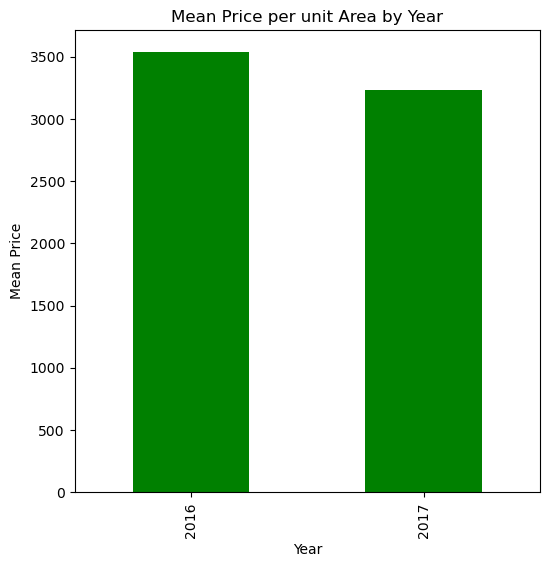

In [131]:
average_price_by_year = df.groupby('Year')['Price_per_unitArea'].mean()
plt.figure(figsize=(6, 6))
average_price_by_year.plot(kind='bar', color='Green')
plt.title('Mean Price per unit Area by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.show()

# the average price in 2016 > Average price in 2017

5.Visualise trends in housing prices with every month in every year

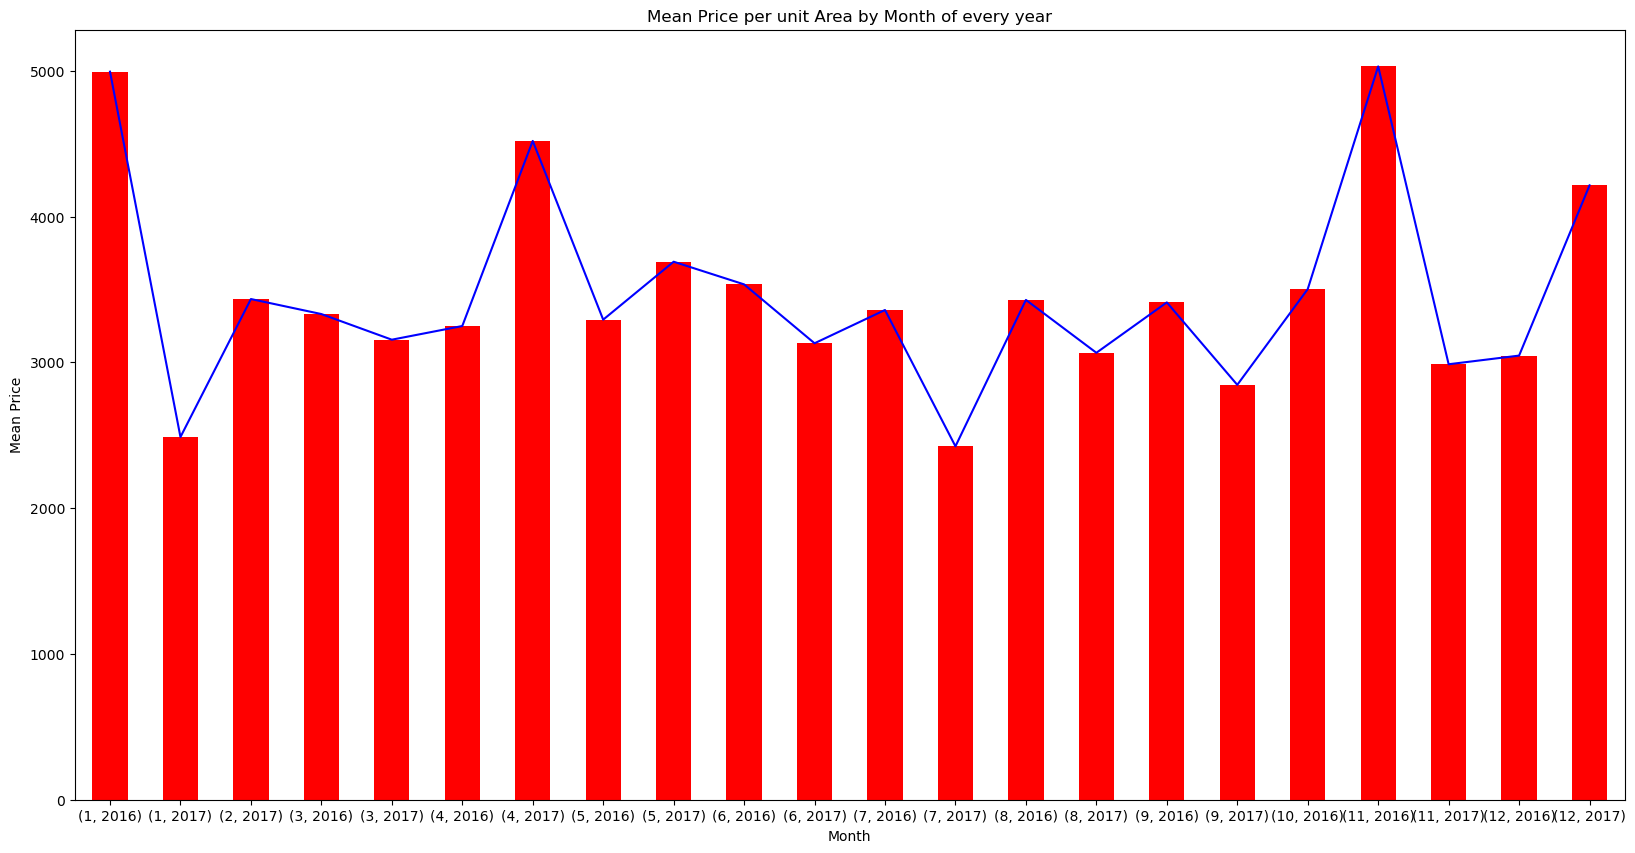

In [132]:
average_price_by_year = df.groupby(['Month', 'Year'])['Price_per_unitArea'].mean()
plt.figure(figsize=(20, 10))
average_price_by_year.plot(kind='bar', color='Red')
average_price_by_year.plot(kind='line', color='blue')
plt.title('Mean Price per unit Area by Month of every year')
plt.xlabel('Month')
plt.ylabel('Mean Price')
plt.show()

6. Univariate Analysis

In [133]:
# We have used Mode of Car feature to handle the missing values
#Let's check the skewness of it

skew_car = df['Car'].skew()
print(f"The skewness of the Car feature: {skew_car}")

# Check skewness of some other features
skew_room = df['Rooms'].skew()
print(f"The skewness of the Rooms feature: {skew_room}")

skew_bath = df['Bathroom'].skew()
print(f"The skewness of the Bathroom feature: {skew_bath}")

The skewness of the Car feature: 1.2496443838525237
The skewness of the Rooms feature: 0.5209664061077002
The skewness of the Bathroom feature: 1.183175556569573


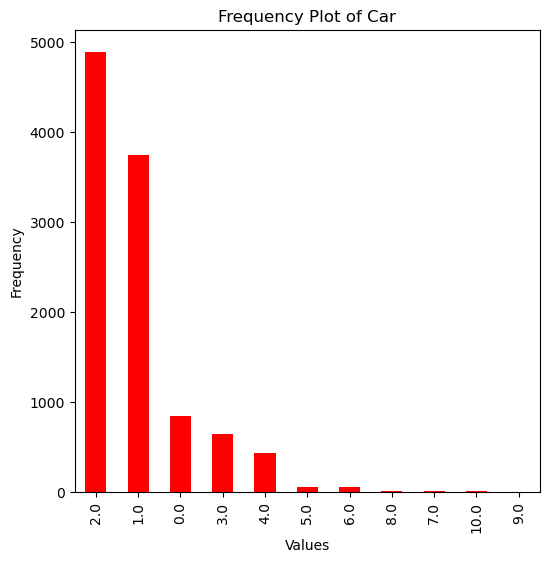

In [134]:
#Plot frequency of different values in 'Car'
value_counts = df['Car'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 6))
value_counts.plot(kind='bar', color='Red')
plt.title('Frequency Plot of Car')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
#Most houses have space for 2 cars, followed by 1 car

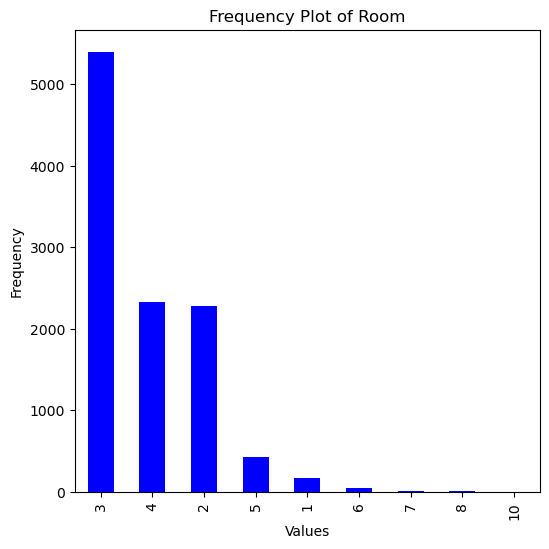

In [135]:
#Plot frequency of different values in 'Rooms'
value_counts = df['Rooms'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 6))
value_counts.plot(kind='bar', color='Blue')
plt.title('Frequency Plot of Room')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
#Most houses have 3 rooms, followed by 4 rooms

7. Bivariate Analysis

<Axes: xlabel='Bathroom', ylabel='Rooms'>

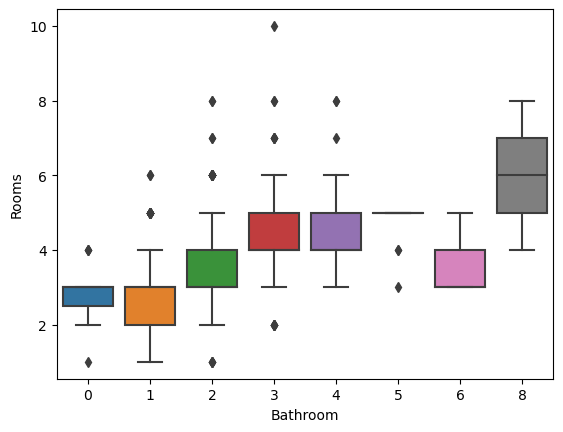

In [136]:
""" From correlation matrix, we can see the features: 'Rooms' and 'Bathrooms'
are highly correlated.
"""
sns.boxplot(y=df['Rooms'], x = df['Bathroom'])

<Axes: xlabel='Car', ylabel='Rooms'>

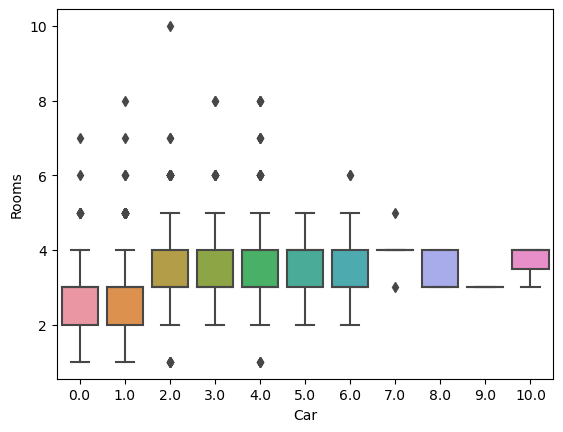

In [137]:
""" From correlation matrix, we can see the features: 'Rooms' and 'Car'
are highly correlated.
"""
sns.boxplot(y=df['Rooms'], x = df['Car'])

8. Analyse the number of properties present in a suburb

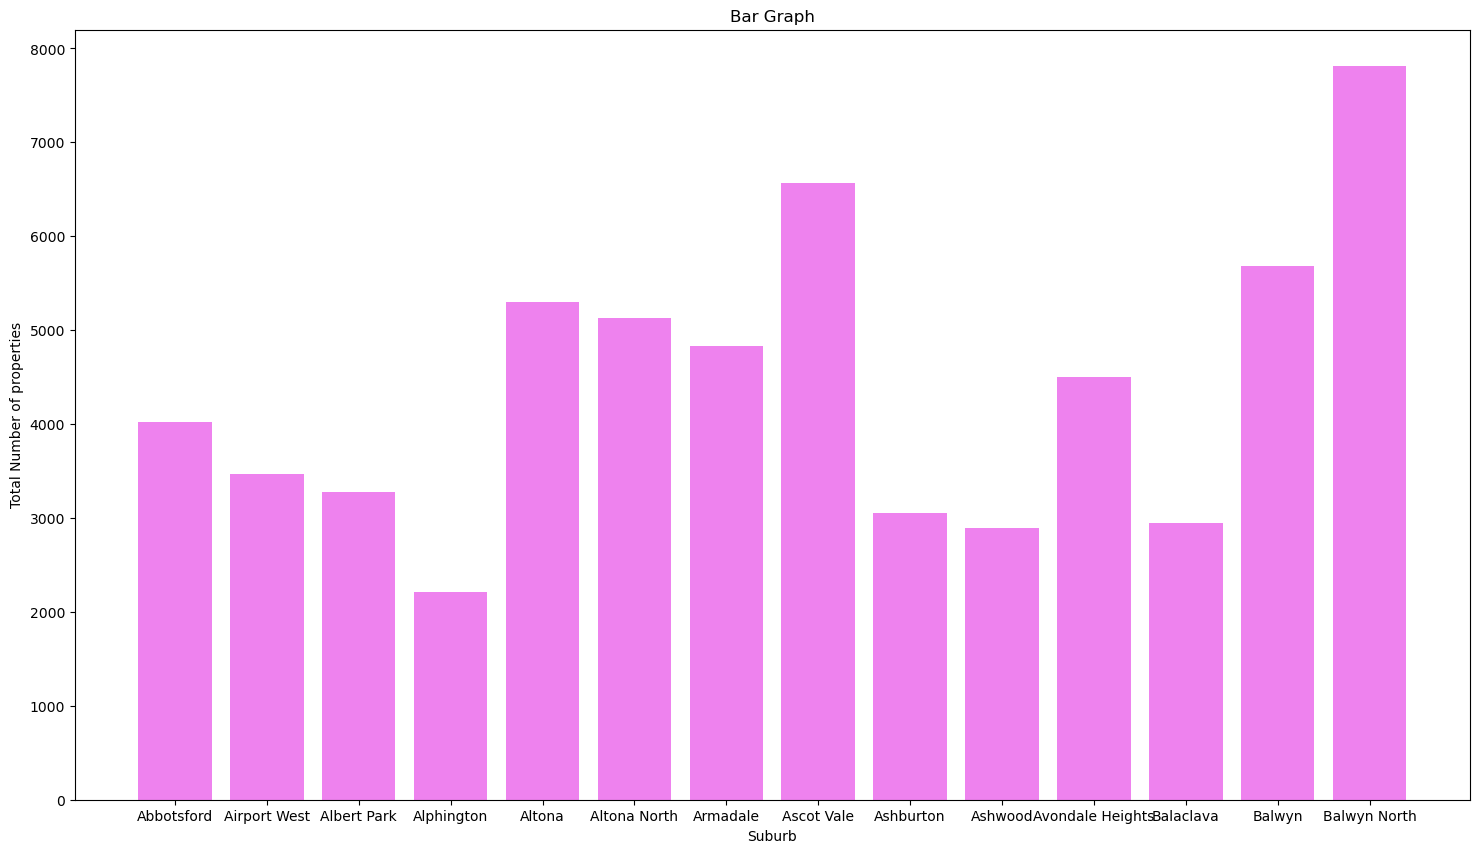

In [138]:
#Visualise The number of property on a suburb on a subset of the dataframe
df_small = df.head(500)
Suburb = df_small['Suburb'].unique()
property_count = df_small['Propertycount'].unique()
plt.figure(figsize=(18, 10))
plt.bar(Suburb, property_count, color='violet')
plt.title('Bar Graph')
plt.xlabel('Suburb')
plt.ylabel('Total Number of properties')
plt.show()

9. Analyse the Mean Price of properties present in a suburb

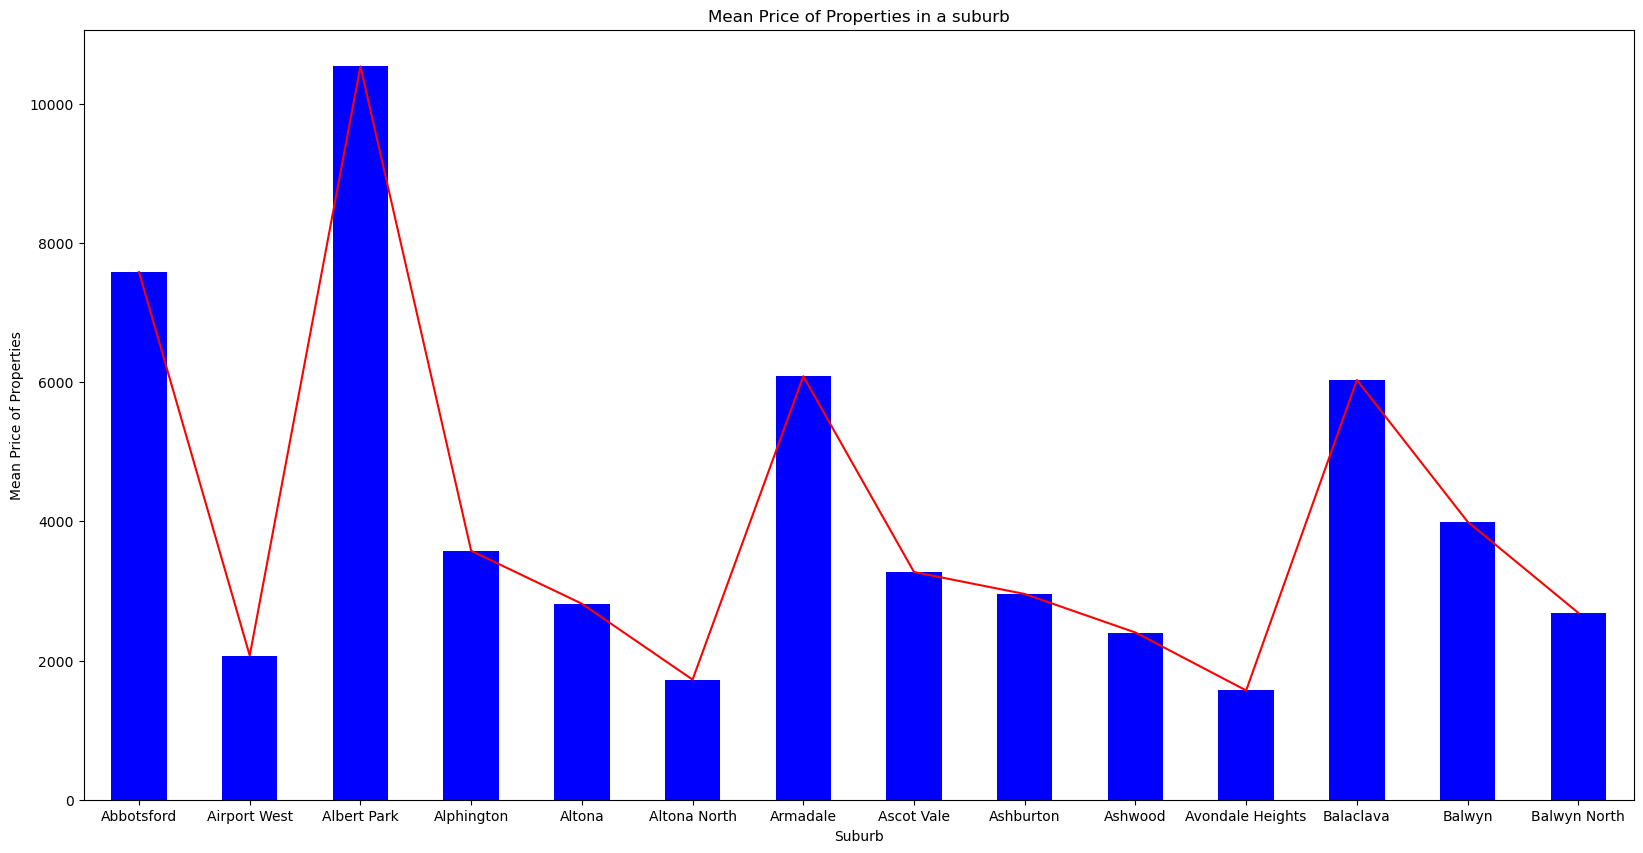

In [139]:
# Analyze the mean price of properties in a Suburb
Properties_on_suburb = df_small.groupby('Suburb')['Price_per_unitArea'].mean()
Properties_on_suburb = Properties_on_suburb[~Properties_on_suburb.isna()]
plt.figure(figsize=(20,10))
Properties_on_suburb.plot(kind='bar', color='blue')
Properties_on_suburb.plot(kind='line', color='red')
plt.title('Mean Price of Properties in a suburb')
plt.xlabel('Suburb')
plt.ylabel('Mean Price of Properties')
plt.show()

10. Visualize the target feature: Price_per_unitArea

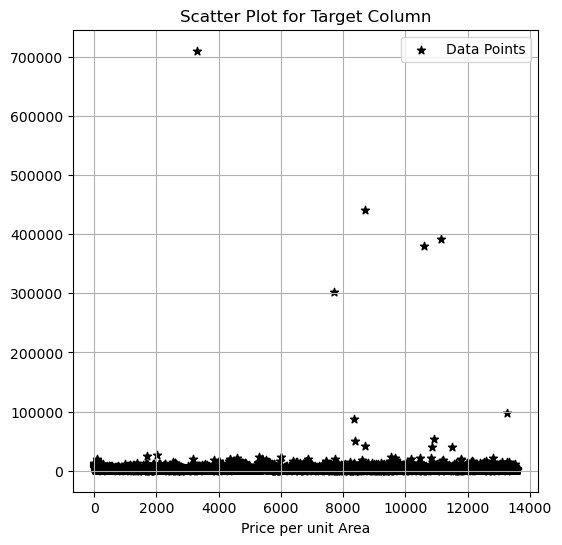

In [140]:
# Visualized the target feature ‘Price_per_unitArea’ and plot Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(df.index, df['Price_per_unitArea'], color='black', marker='*', label='Data Points')
plt.title('Scatter Plot for Target Column')
plt.xlabel('Price per unit Area')
# plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

#Data Cleaning: Part-2

7. Encode categorical data

In [141]:
#One hot encode categorical data
obj_col = ['Type']
for col in obj_col:
  df= pd.get_dummies(df, columns=[col])

# df.tail()

In [142]:
df=df.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Regionname'], axis=1)

In [143]:
df.head()

,Rooms,Distance,Postcode,Bathroom,Car,Propertycount,Price_per_unitArea,Year,Month,Day,Type_h,Type_t,Type_u
0,2,2.5,3067,1,1.0,4019,7326.732673,2016,3,12,1,0,0
1,2,2.5,3067,1,0.0,4019,6634.615385,2016,4,2,1,0,0
2,3,2.5,3067,2,0.0,4019,10932.835821,2017,4,3,1,0,0
3,3,2.5,3067,2,1.0,4019,9042.553191,2017,4,3,1,0,0
4,4,2.5,3067,1,2.0,4019,13333.333333,2016,4,6,1,0,0


In [144]:
df.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Propertycount',
       'Price_per_unitArea', 'Year', 'Month', 'Day', 'Type_h', 'Type_t',
       'Type_u'],
      dtype='object')

11. Normalize the dataset

In [145]:
cols = df.columns
cols

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Propertycount',
       'Price_per_unitArea', 'Year', 'Month', 'Day', 'Type_h', 'Type_t',
       'Type_u'],
      dtype='object')

In [146]:
#Normalize the columns having continous values
cols_ = ['Rooms','Distance','Postcode','Car', 'Bathroom','Propertycount', 'Price_per_unitArea'  ]
for column in cols_:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [147]:
df.head()

,Rooms,Distance,Postcode,Bathroom,Car,Propertycount,Price_per_unitArea,Year,Month,Day,Type_h,Type_t,Type_u
0,0.111111,0.052854,0.068577,0.125,0.1,0.170735,0.010130,2016,3,12,1,0,0
1,0.111111,0.052854,0.068577,0.125,0.0,0.170735,0.009155,2016,4,2,1,0,0
2,0.222222,0.052854,0.068577,0.250,0.0,0.170735,0.015210,2017,4,3,1,0,0
3,0.222222,0.052854,0.068577,0.250,0.1,0.170735,0.012547,2017,4,3,1,0,0
4,0.333333,0.052854,0.068577,0.125,0.2,0.170735,0.018591,2016,4,6,1,0,0


12. Handling Datetime feature (continued): Normalizing them

In [148]:
#one hot encode Year and Month columns
df = pd.get_dummies(df, columns=['Year', 'Month'])

#normalize Day column
df['Day'] = (df['Day'] - df['Day'].min()) / (df['Day'].max() - df['Day'].min())

In [149]:
df.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Propertycount',
       'Price_per_unitArea', 'Day', 'Type_h', 'Type_t', 'Type_u', 'Year_2016',
       'Year_2017', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [150]:
#df.to_csv('melb_data_cleaned.csv')

##PHASE-2

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
df = pd.read_csv('melb_data_cleaned.csv')

In [153]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [154]:
Y = df['Price_per_unitArea']
X = df.drop('Price_per_unitArea', axis=1)

In [155]:
X= X.drop(columns = ['Postcode'])

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [157]:
X.head()

,Rooms,Distance,Bathroom,Car,Propertycount,Type_h,Type_t,Type_u
0,0.111111,0.052854,0.125,0.1,0.170735,1,0,0
1,0.111111,0.052854,0.125,0.0,0.170735,1,0,0
2,0.222222,0.052854,0.250,0.0,0.170735,1,0,0
3,0.222222,0.052854,0.250,0.1,0.170735,1,0,0
4,0.333333,0.052854,0.125,0.2,0.170735,1,0,0


#Implementing Linear Regression Algorithm

In [158]:
# Instantiate a Linear Regression Model
regr = LinearRegression()

# Fit the model using the training data
regr.fit(X_train, Y_train)

# Predict the price per unit area using the test data on the trained model
predictions = regr.predict(X_test)

# Calculate the Mean Squared Error comparing the actual and the predicted price per unit area to evalaute the model's performance
mse = mean_squared_error(Y_test, predictions)

# Calculate R-Score
r = regr.score(X_test, Y_test)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score: {r}')

Mean Squared Error: 1.1585954190263127e-05
Regression Score: 0.2965986780752108


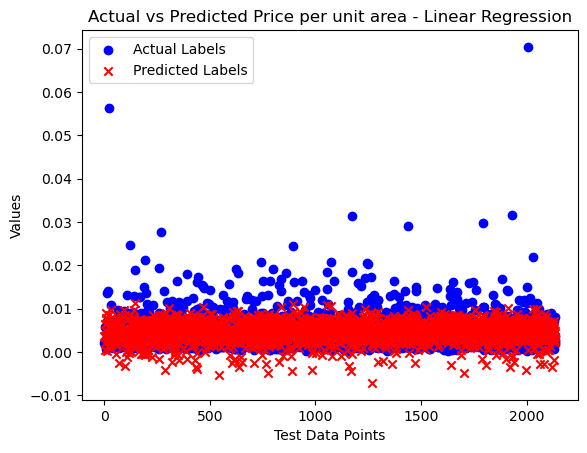

In [159]:
# We plotted the Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - Linear Regression')
plt.legend()
plt.show()

# Bayesian Ridge Regression

In [160]:
from sklearn.linear_model import BayesianRidge

# Instantiate Bayesian Ridge Regression Model
bayesian_model = BayesianRidge()

# Fit the model to the training data
bayesian_model.fit(X_train, Y_train)

# Predict the price per unit area using the test data on the trained model
predictions = bayesian_model.predict(X_test)

# Calculate the Mean Squared Error comparing the actual and the predicted price per unit area to evalaute the model's performance
mse = mean_squared_error(Y_test, predictions)
# Calculate R-Score
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score (R^2): {r2}')

Mean Squared Error: 1.1608510523694958e-05
Regression Score (R^2): 0.2952292479451435


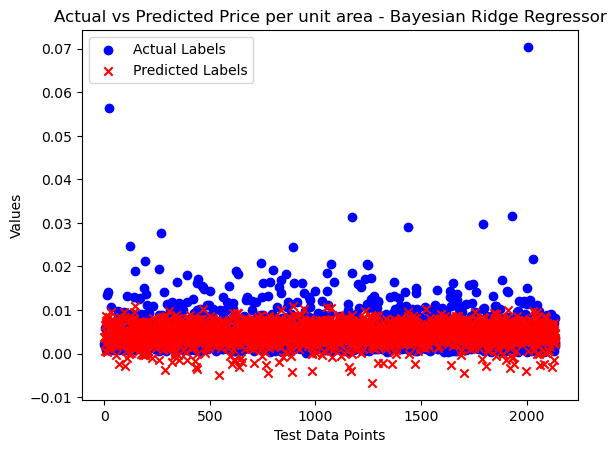

In [161]:
# Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - Bayesian Ridge Regressor')
plt.legend()
plt.show()

# K-Nearest Neighbors Regressor Algorithm

In [162]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors= 223)

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

# Predict the price per unit area using the test data on the trained model
predictions = knn_model.predict(X_test)

# Evaluate the model's performance by calculating MSE and R-Score
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score (R^2): {r2}')

Mean Squared Error: 1.1130217154441647e-05
Regression Score (R^2): 0.3242671832481657


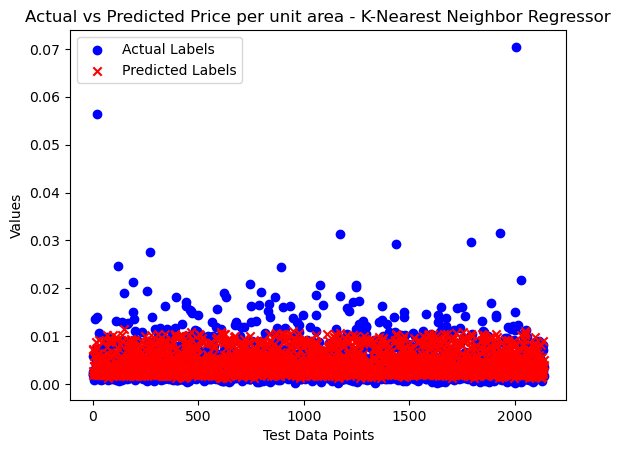

In [163]:
# Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - K-Nearest Neighbor Regressor')
plt.legend()
plt.show()

# Elastic Net Regression Algorithm

In [164]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.001, l1_ratio=0.001)

# Fit the model to the training data
elastic_net_model.fit(X_train, Y_train)

# Predict the price per unit area using the test data on the trained model
predictions = elastic_net_model.predict(X_test)

# Evaluate the model's performance by calculating MSE and R-Score
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score (R^2): {r2}')

Mean Squared Error: 1.1641930738262802e-05
Regression Score (R^2): 0.29320025467277355


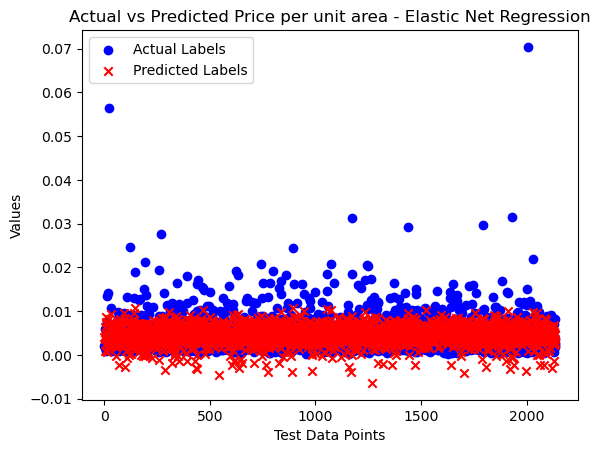

In [165]:
# Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - Elastic Net Regression')
plt.legend()
plt.show()

# Neural Network

In [166]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
# Instantiate a Neural Network model with
# first hidden layer with 128 neurons, ReLU Activation function, and input shape matching the number of features
# second hidden layer with 64 neurons and ReLU activation function
# Output layer with 1 neuron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with Adam optimizer and loss function as mean squared error
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
# We ran the model for 50 epochs, input batch size of 32, and a validation split of 0.1 for monitoring validation performance
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

# Predict the price per unit area using the test data on the trained model
predictions = model.predict(X_test).flatten()

# Evaluate the model's performance by calculating MSE and R-Score
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score (R^2): {r2}')

Epoch 1/50

241/241 [==============================] - 5s 10ms/step - loss: 5.3397e-04 - val_loss: 1.3166e-05
Epoch 2/50
241/241 [==============================] - 1s 6ms/step - loss: 3.3315e-04 - val_loss: 1.4973e-05
Epoch 3/50
241/241 [==============================] - 1s 5ms/step - loss: 3.5654e-04 - val_loss: 1.8720e-05
Epoch 4/50
241/241 [==============================] - 1s 6ms/step - loss: 3.3664e-04 - val_loss: 1.4546e-05
Epoch 5/50
241/241 [==============================] - 1s 5ms/step - loss: 3.2923e-04 - val_loss: 9.6254e-06
Epoch 6/50
241/241 [==============================] - 1s 5ms/step - loss: 3.2582e-04 - val_loss: 1.1910e-05
Epoch 7/50
241/241 [==============================] - 1s 5ms/step - loss: 3.1479e-04 - val_loss: 2.4349e-05
Epoch 8/50
241/241 [==============================] - 1s 5ms/step - loss: 3.1658e-04 - val_loss: 4.7630e-05
Epoch 9/50
241/241 [==============================] - 1s 5ms/step - loss: 3.2356e-04 - val_loss: 2.5442e-05
Epoch 10/50
241/241 [=====

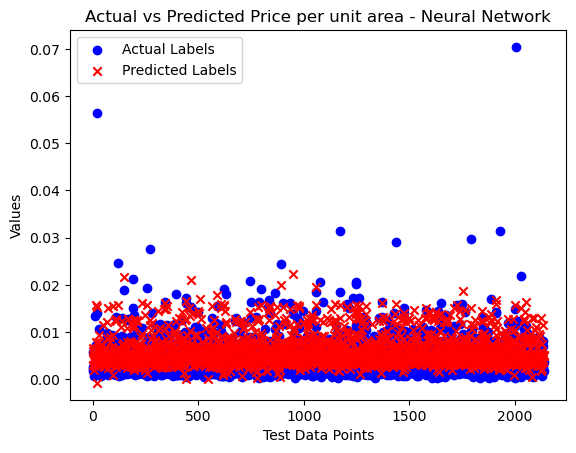

In [167]:
# Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - Neural Network')
plt.legend()
plt.show()

# Support Vector Regressor Algorithm

In [168]:
from sklearn.svm import SVR

# Instantiate SVR Model with Polynomial kernel, regularization parameter C =1, and epsilon = 0.001
svr_model = SVR(kernel='poly', C=1, epsilon=0.001)

# Fit the model to the training data
svr_model.fit(X_train, Y_train)

# Predict the price per unit area using the test data on the trained model
predictions = svr_model.predict(X_test)

# Evaluate the model's performance by calculating MSE and R-Score
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Regression Score (R^2): {r2}')

Mean Squared Error: 9.629951587552319e-06
Regression Score (R^2): 0.4153506422070373


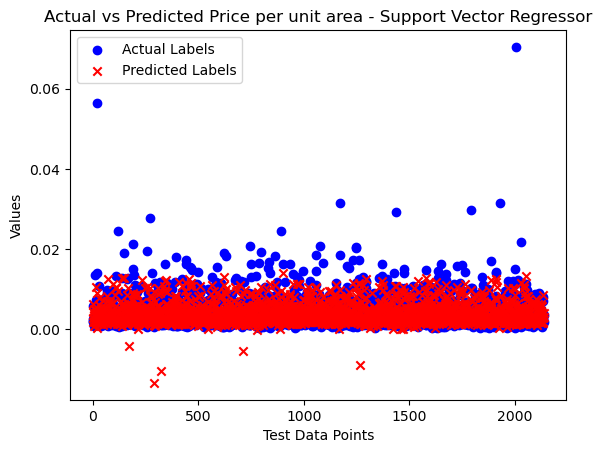

In [169]:
# Scatter plot between the Actual and the Predicted Price per unit area

plt.scatter(range(1, len(Y_test) + 1), Y_test, label='Actual Labels', marker='o', color = 'blue')
plt.scatter(range(1, len(predictions) + 1), predictions, label='Predicted Labels', marker='x', color = 'red')

plt.xlabel('Test Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Price per unit area - Support Vector Regressor')
plt.legend()
plt.show()

In [170]:
import pickle
pickle_out = open("svr_model.pkl", "wb")
pickle.dump(svr_model, pickle_out)
pickle_out.close()